# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Fitria Anggraini
- Email: ftranggra23@gmail.com
- Id Dicoding: ftriaanggra23

## Persiapan

### Menyiapkan library yang dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

### Menyiapkan data yang akan diguankan

In [ ]:
url = "https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/employee/employee_data.csv"
df_edu = pd.read_csv(url)

## Data Understanding

### Struktur Data

In [ ]:
df_edu.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


In [ ]:
df_edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [ ]:
df_edu.isnull().sum()

,0
EmployeeId,0
Age,0
Attrition,412
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0


In [ ]:
df_edu.duplicated().sum()

np.int64(0)

### Statistik Deskriptif

In [ ]:
df_edu.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
EmployeeId,1470.0,735.500000,424.496761,1.0,368.25,735.5,1102.75,1470.0
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
Attrition,1058.0,0.169187,0.375094,0.0,0.00,0.0,0.00,1.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0


* EmployeeCount dan StandardHours memiliki nilai konstan (semua 1 dan 80). Ini berarti kolom tersebut tidak berguna untuk prediksi dan bisa dipertimbangkan untuk dihapus.
* Over18 juga memiliki nilai sama semua ("Y"), sehingga tidak informatif untuk model.
* Missing Value: perlu diperhatikan bahwa Attrition mengandung nilai kosong, sehingga harus ditangani sebelum modeling.
* Banyak fitur kategorikal yang perlu di-encode sebelum dimasukkan ke model machine learning.

### Distribusi Target (Attrition)

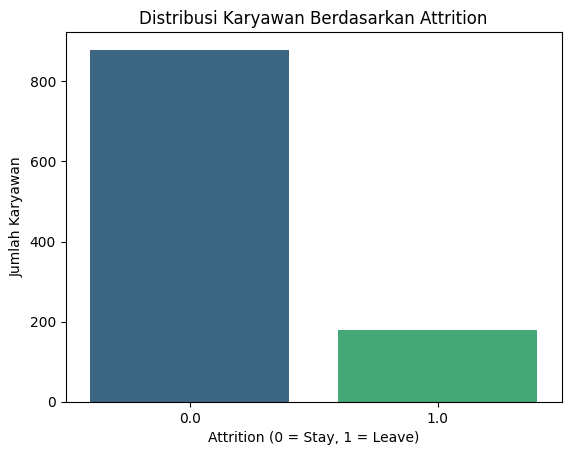

In [ ]:
sns.countplot(x='Attrition', data=df_edu, palette='viridis')
plt.title('Distribusi Karyawan Berdasarkan Attrition')
plt.xlabel('Attrition (0 = Stay, 1 = Leave)')
plt.ylabel('Jumlah Karyawan')
plt.show()

Mayoritas karyawan berada pada kategori 0 (Stay), yaitu jumlahnya jauh lebih banyak dibandingkan yang keluar. Hanya sebagian kecil karyawan yang mengalami attrition (keluar). Ini menunjukkan bahwa tingkat attrition di perusahaan relatif rendah, dan sebagian besar karyawan memilih untuk tetap bertahan.

### Distribusi Fitur Numerikal Berdasarkan Attrition

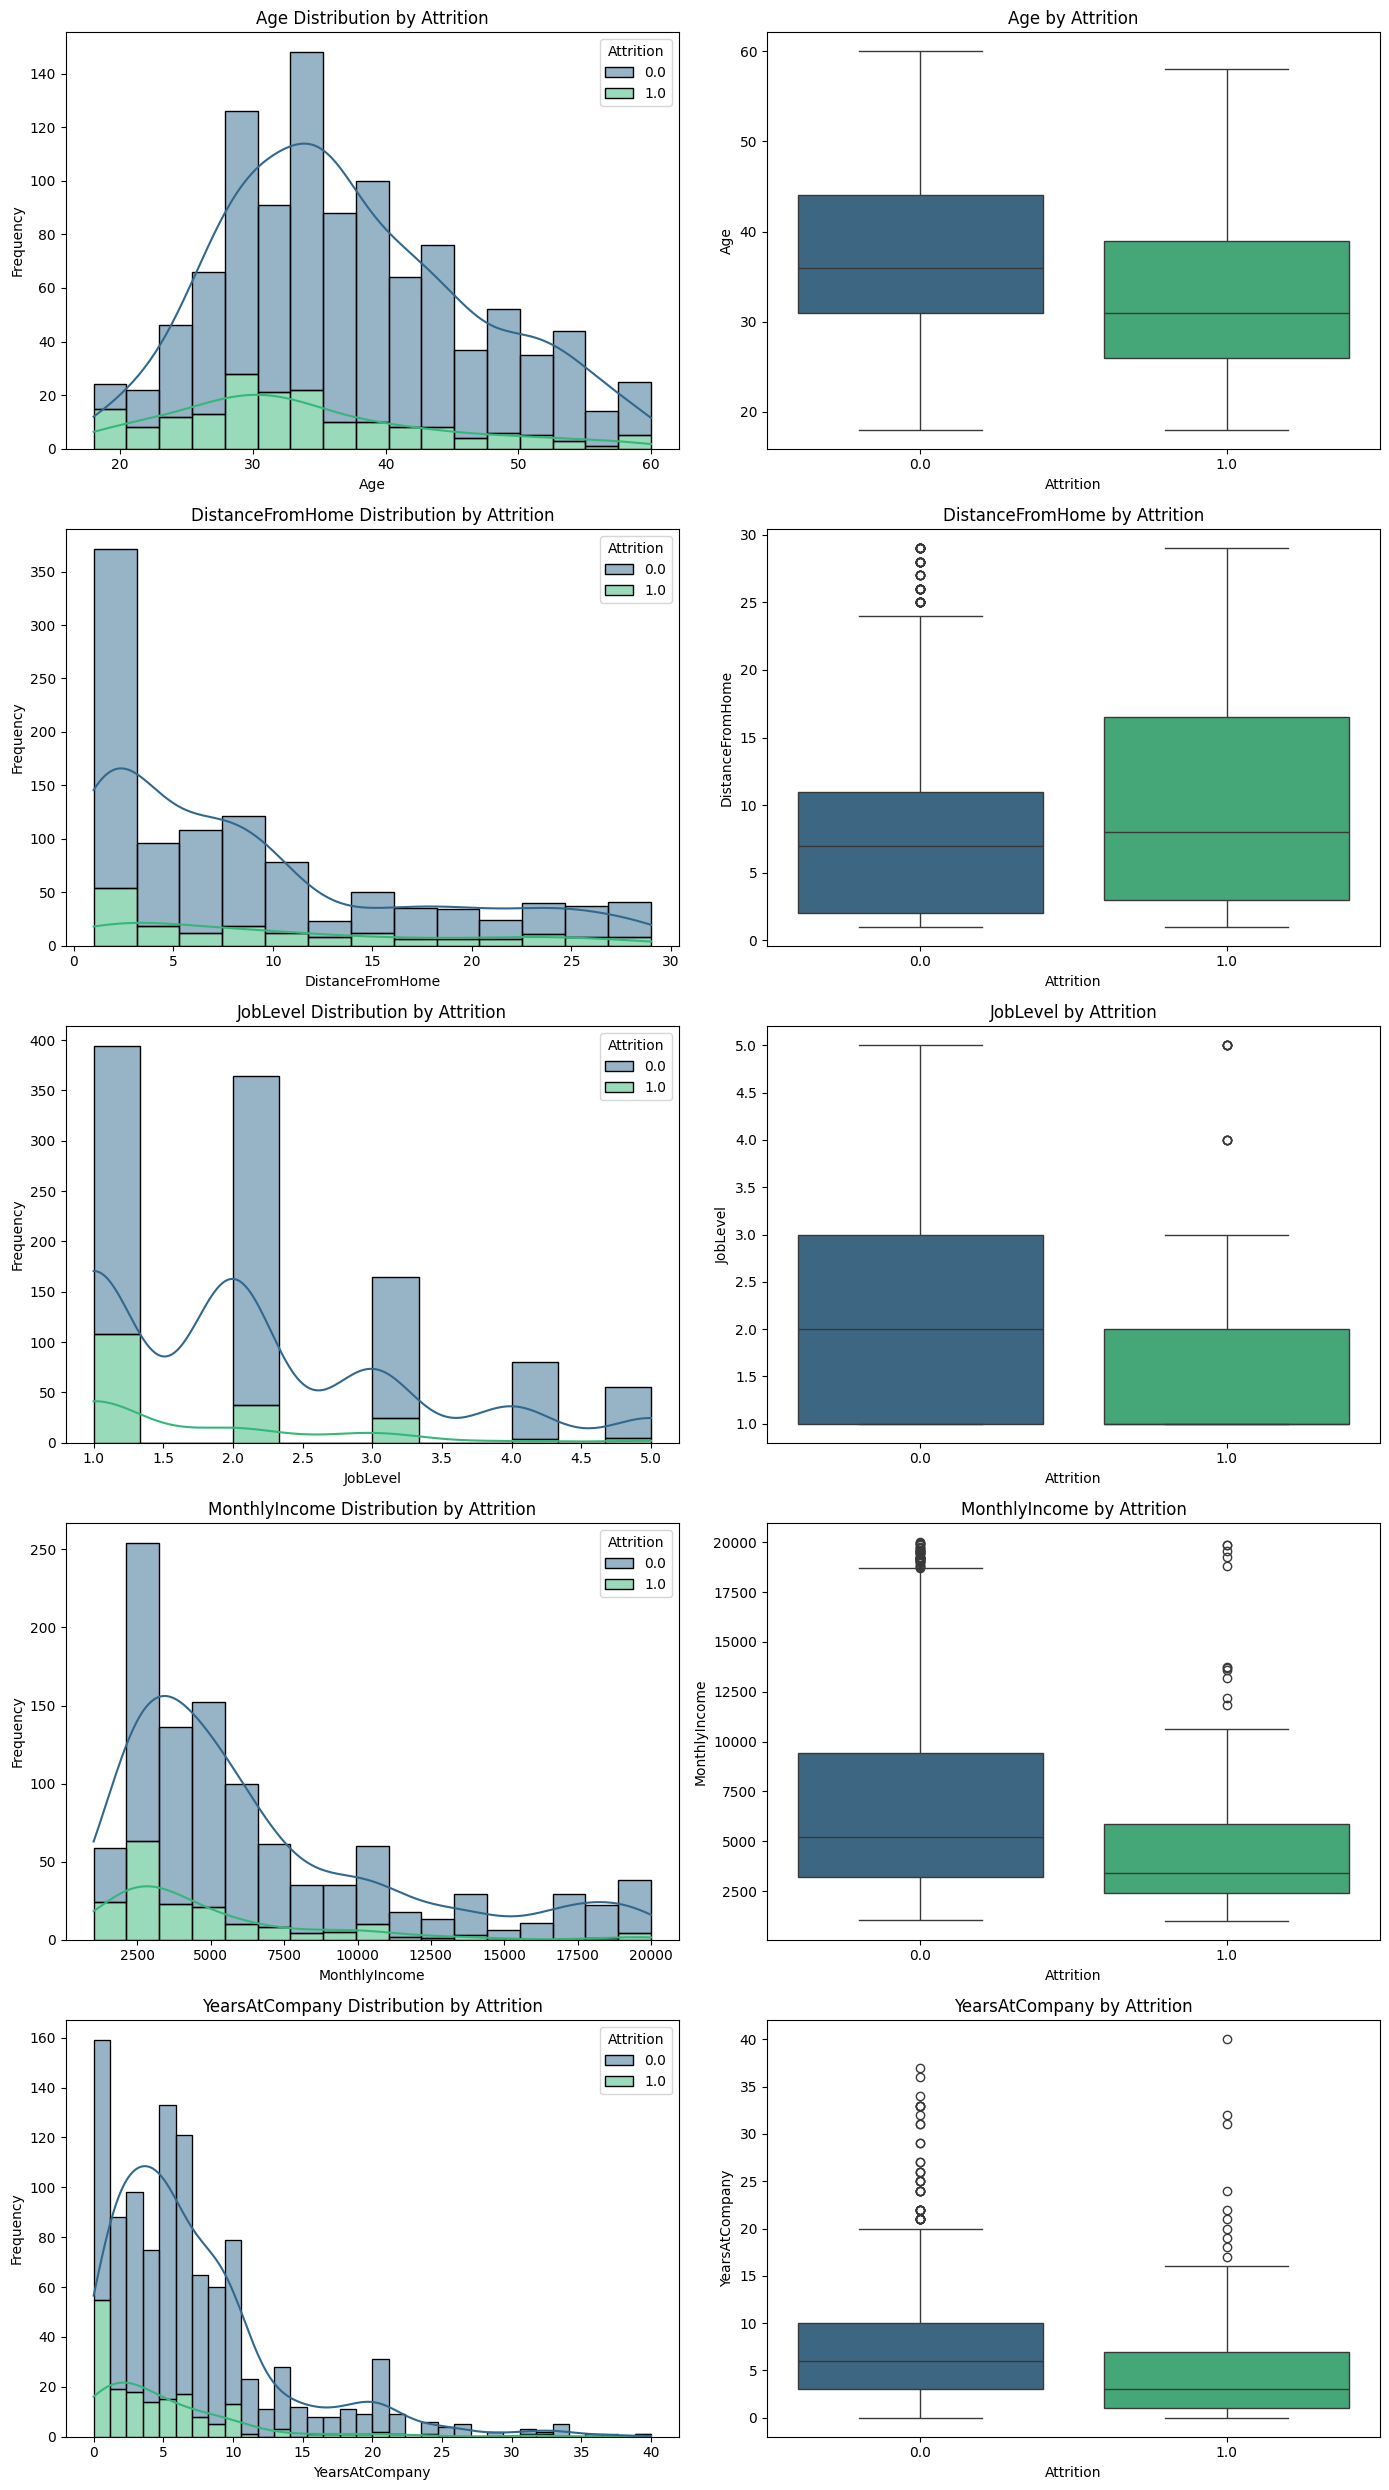

In [ ]:
numerical_features = ['Age', 'DistanceFromHome', 'JobLevel', 'MonthlyIncome', 'YearsAtCompany']
fig, axes = plt.subplots(len(numerical_features), 2, figsize=(14, 5 * len(numerical_features)))

for i, feature in enumerate(numerical_features):
    sns.histplot(data=df_edu.dropna(subset=['Attrition']), x=feature, hue="Attrition", multiple="stack", kde=True,
                 ax=axes[i, 0], palette="viridis")
    axes[i, 0].set_title(f"{feature} Distribution by Attrition")
    axes[i, 0].set_xlabel(feature)
    axes[i, 0].set_ylabel("Frequency")

    sns.boxplot(x="Attrition", y=feature, data=df_edu.dropna(subset=['Attrition']), ax=axes[i, 1], palette="viridis")
    axes[i, 1].set_title(f"{feature} by Attrition")
    axes[i, 1].set_xlabel("Attrition")
    axes[i, 1].set_ylabel(feature)

plt.tight_layout()
plt.show()

Pada analisis ini, dilakukan eksplorasi terhadap beberapa fitur penting untuk melihat hubungan potensial dengan Attrition (keputusan karyawan untuk keluar atau bertahan).

1. Age
Dari histogram dan boxplot, terlihat bahwa karyawan yang keluar (Attrition = 1) cenderung berusia lebih muda dibandingkan dengan yang bertahan. Rentang usia karyawan yang keluar lebih terkonsentrasi antara 20 hingga 40 tahun. Hal ini menunjukkan bahwa usia muda lebih rentan terhadap attrition.

2. Distance From Home
Karyawan yang keluar cenderung memiliki jarak perjalanan ke kantor lebih jauh dibandingkan yang bertahan. Distribusi menunjukkan bahwa karyawan dengan jarak yang lebih pendek relatif lebih setia, sedangkan semakin jauh jarak, semakin besar kemungkinan attrition.

3. Job Level
Mayoritas karyawan yang keluar berada pada Job Level 1 (posisi level rendah). Semakin tinggi job level, tampaknya semakin kecil kemungkinan karyawan untuk keluar. Ini mengindikasikan bahwa karyawan dengan jabatan lebih rendah lebih rentan meninggalkan perusahaan.

4. Monthly Income
Karyawan yang keluar umumnya memiliki pendapatan bulanan yang lebih rendah. Boxplot memperlihatkan bahwa median penghasilan untuk karyawan yang bertahan lebih tinggi dibandingkan yang keluar. Ini menguatkan dugaan bahwa tingkat pendapatan yang lebih rendah berhubungan dengan tingkat attrition yang lebih tinggi.

5. Years at Company
Karyawan yang keluar biasanya memiliki masa kerja yang lebih pendek di perusahaan. Kebanyakan karyawan yang keluar memiliki pengalaman kurang dari 5 tahun di perusahaan. Ini menunjukkan bahwa tahun-tahun awal di perusahaan adalah masa paling rawan terjadinya attrition.


### Distribusi Fitur Kategorikal Berdasarkan Attrition

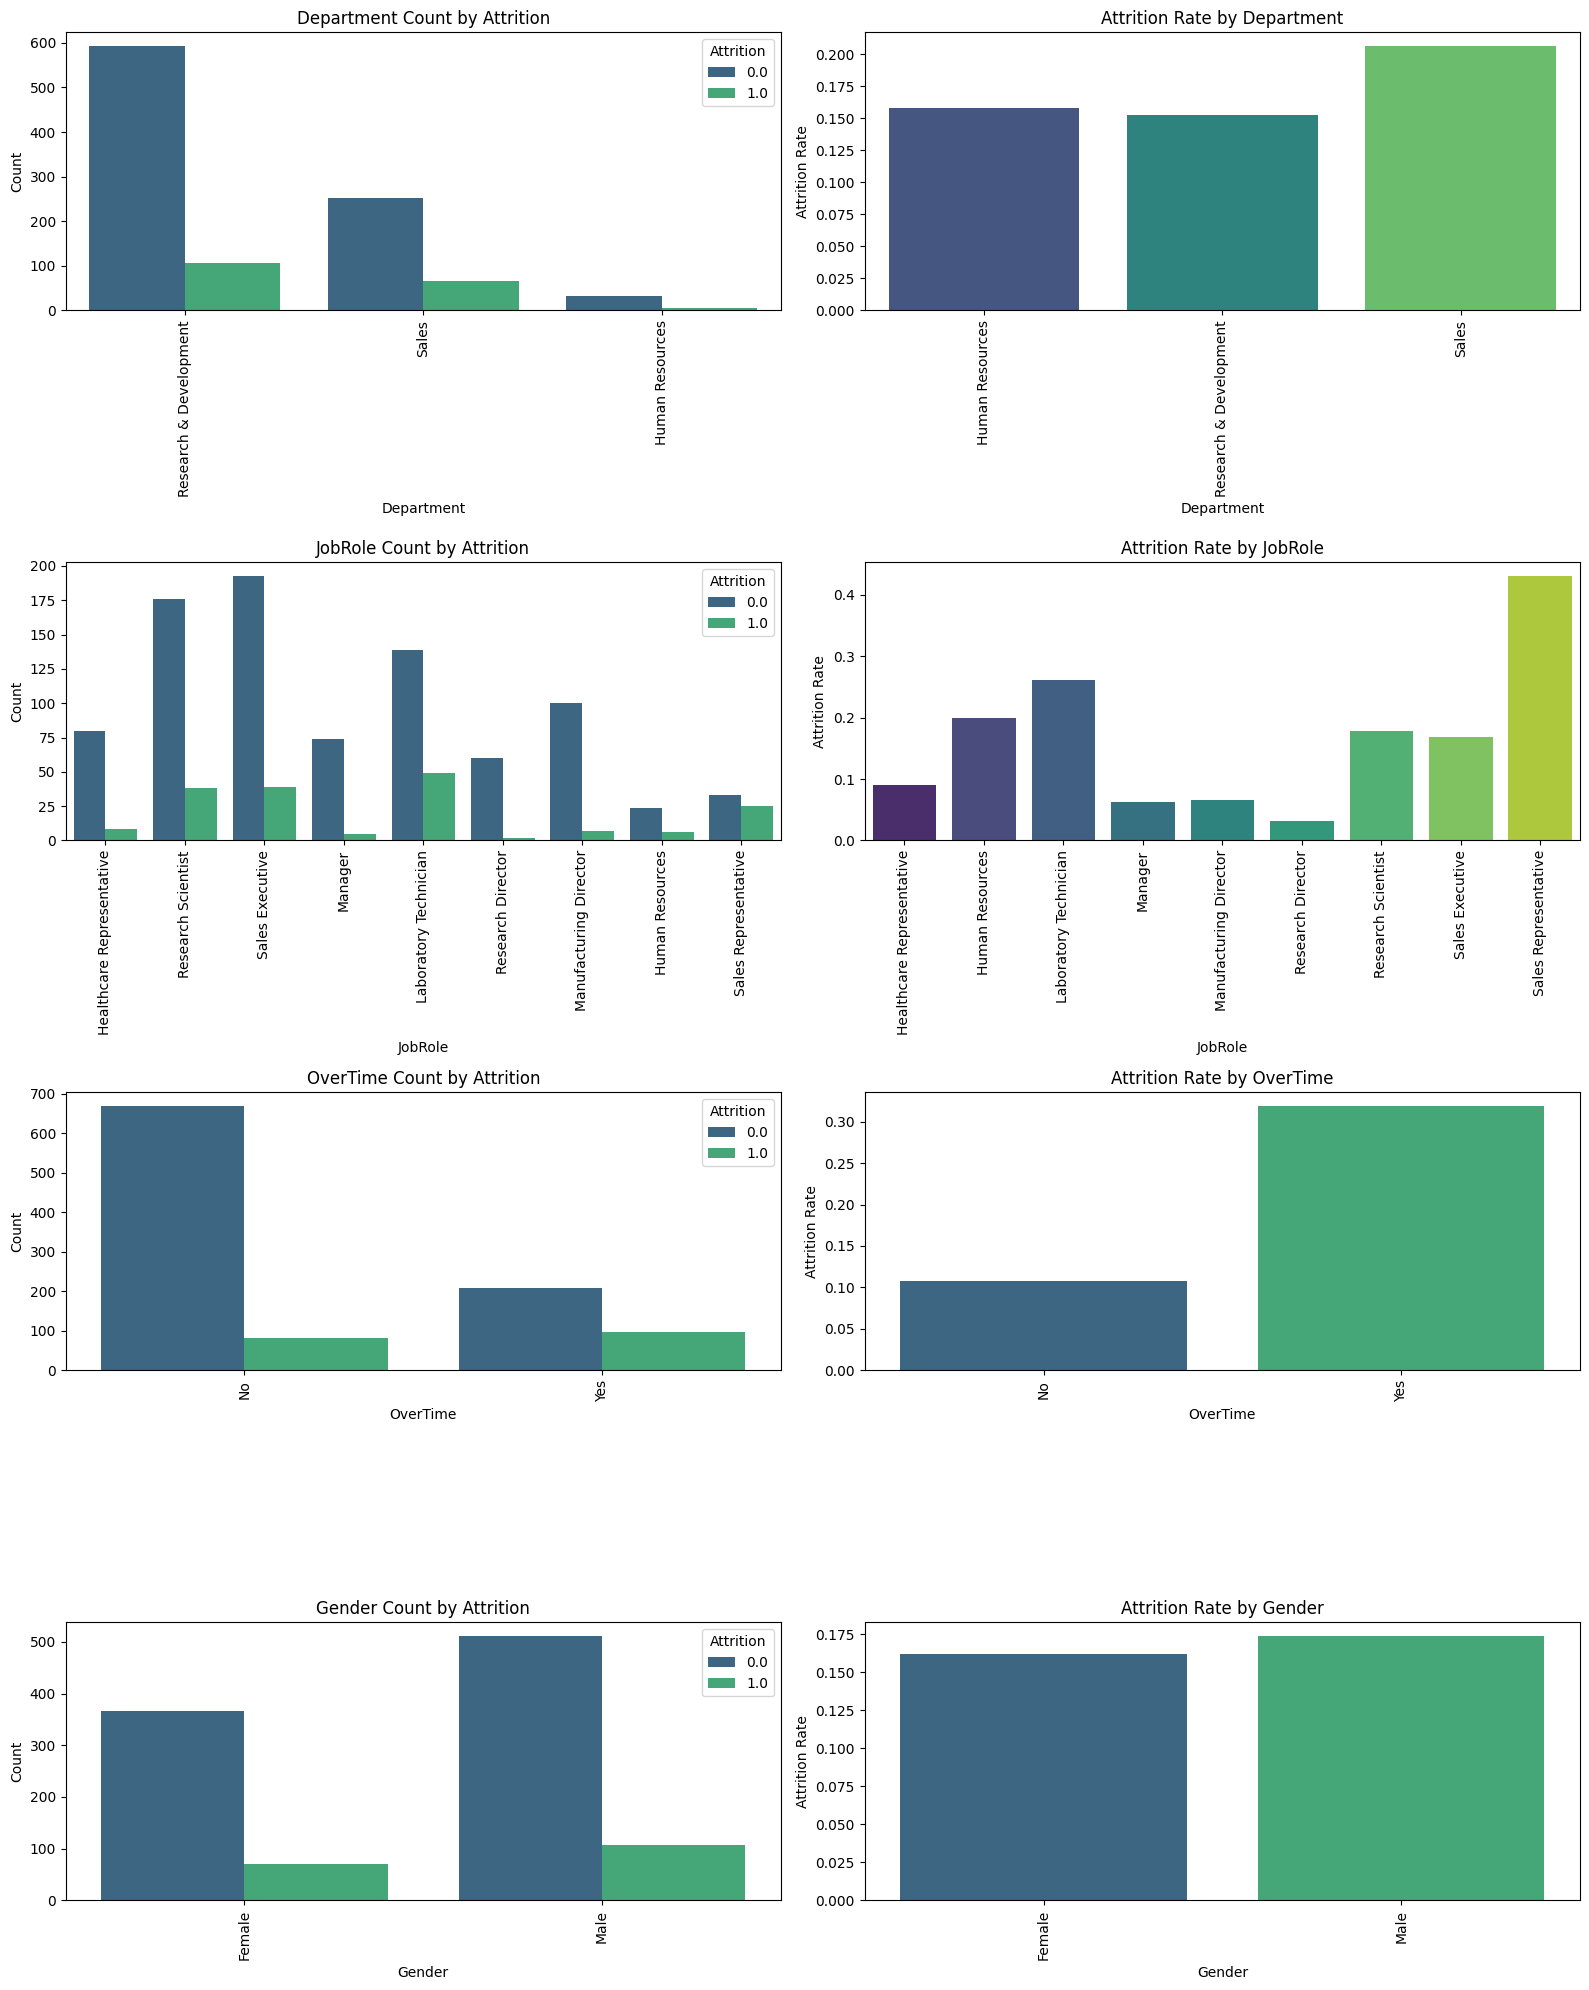

In [ ]:
categorical_features = ['Department', 'JobRole', 'OverTime', 'Gender']

fig, axes = plt.subplots(len(categorical_features), 2, figsize=(16, 5 * len(categorical_features)))

if len(categorical_features) == 1:
    axes = axes.reshape(1, 2)

df_edu['Attrition_Num'] = df_edu['Attrition']

for i, feature in enumerate(categorical_features):
    data_plot = df_edu.dropna(subset=[feature, 'Attrition'])

    sns.countplot(x=feature, hue="Attrition", data=data_plot, ax=axes[i, 0], palette="viridis")
    axes[i, 0].set_title(f"{feature} Count by Attrition")
    axes[i, 0].set_xlabel(feature)
    axes[i, 0].set_ylabel("Count")
    axes[i, 0].tick_params(axis='x', rotation=90)

    attrition_rate = data_plot.groupby(feature)['Attrition_Num'].mean().reset_index()
    sns.barplot(x=feature, y="Attrition_Num", data=attrition_rate, ax=axes[i, 1], palette="viridis")
    axes[i, 1].set_title(f"Attrition Rate by {feature}")
    axes[i, 1].set_xlabel(feature)
    axes[i, 1].set_ylabel("Attrition Rate")
    axes[i, 1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

Analisis ini mengevaluasi pengaruh beberapa fitur kategorikal terhadap tingkat attrition karyawan.

1. Department
Mayoritas karyawan berasal dari Research & Development, diikuti oleh Sales dan Human Resources. Tingkat attrition tertinggi ditemukan di departemen Sales, sedangkan departemen Research & Development memiliki tingkat attrition yang lebih rendah. Artinya, karyawan di departemen Sales lebih cenderung keluar dibandingkan departemen lainnya.

2. Job Role
Dari segi jumlah, posisi Sales Executive dan Research Scientist memiliki jumlah karyawan terbanyak. Berdasarkan tingkat attrition, Sales Representative menunjukkan tingkat keluar paling tinggi, diikuti oleh Laboratory Technician dan Sales Executive. Ini menunjukkan bahwa posisi jabatan tertentu memiliki risiko attrition yang lebih besar dibandingkan posisi lain.

3. OverTime
Attrition jauh lebih umum terjadi pada karyawan yang sering lembur (OverTime = Yes). Tingkat attrition untuk karyawan lembur lebih dari dua kali lipat dibandingkan karyawan yang tidak lembur. Hal ini mengindikasikan bahwa lembur berlebih bisa menjadi salah satu faktor pendorong attrition.

4. Gender
Jumlah karyawan pria lebih banyak dibandingkan wanita. Tingkat attrition antara pria dan wanita hampir serupa, tetapi sedikit lebih tinggi pada karyawan pria. Ini menunjukkan bahwa gender tidak terlalu berpengaruh signifikan terhadap keputusan untuk keluar dalam data ini.



### Heatmap Korelasi Antar Fitur

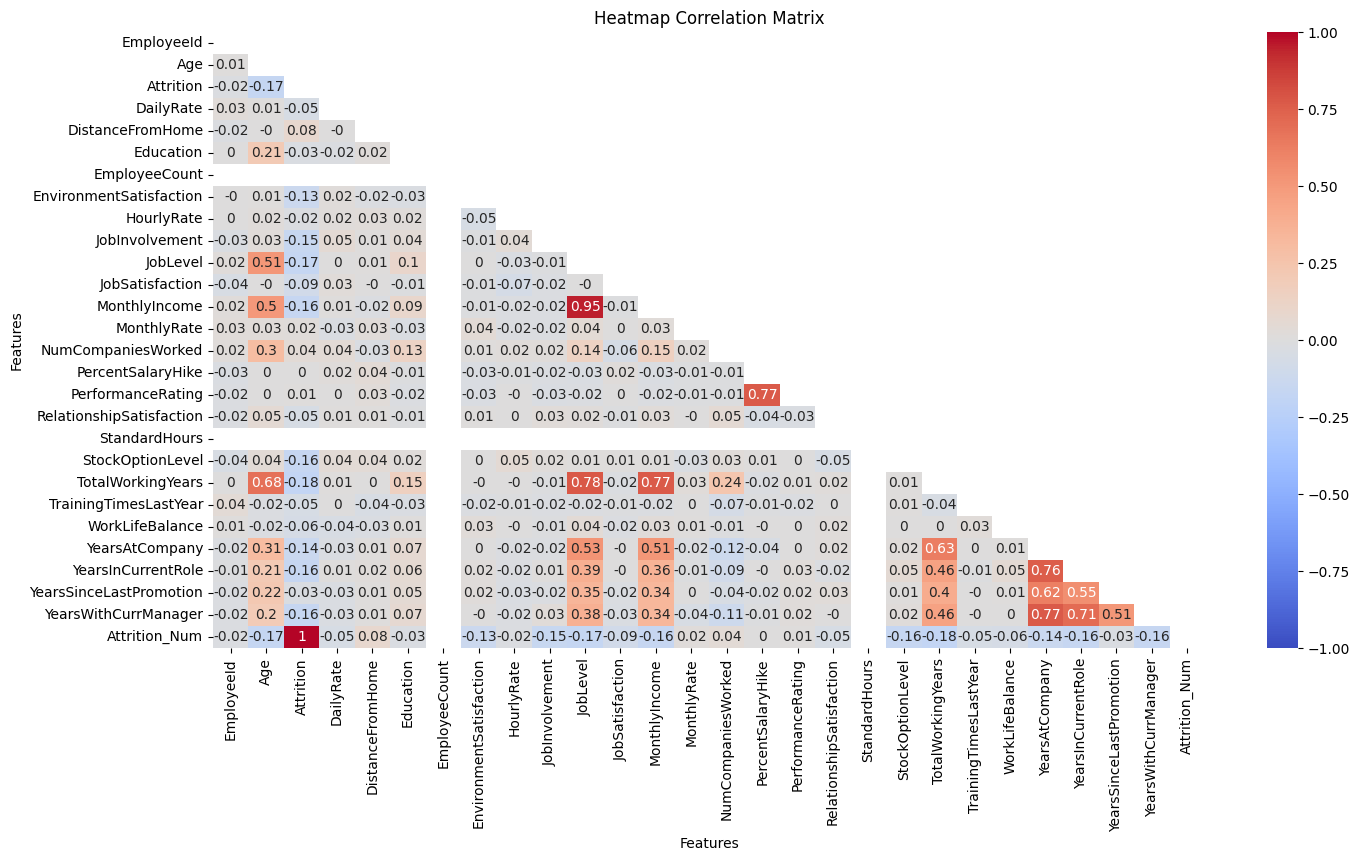

In [ ]:
plt.figure(figsize=(16, 8))
correlation_matrix = df_edu.corr(numeric_only=True).round(2)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", mask=mask, vmin=-1, vmax=1)
plt.title('Heatmap Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

Berdasarkan heatmap korelasi di atas, secara umum hubungan antar fitur dalam dataset ini tergolong lemah hingga sedang. Fitur TotalWorkingYears menunjukkan korelasi positif yang cukup kuat dengan JobLevel (0.68) dan MonthlyIncome (0.78), yang mengindikasikan bahwa semakin lama seseorang bekerja, biasanya semakin tinggi posisi jabatannya dan semakin besar pula pendapatan bulanannya. Selain itu, YearsAtCompany juga memiliki korelasi yang cukup tinggi terhadap YearsInCurrentRole (0.77), YearsSinceLastPromotion (0.62), dan YearsWithCurrManager (0.71), menggambarkan bahwa masa kerja karyawan di perusahaan berhubungan erat dengan lamanya mereka menempati posisi saat ini, waktu sejak promosi terakhir, dan durasi bekerja bersama manajer yang sama.

Sementara itu, fitur target Attrition (dilihat dari Attrition_Num) memiliki korelasi negatif yang lemah terhadap beberapa variabel seperti Age (-0.17), TotalWorkingYears (-0.16), dan YearsAtCompany (-0.14). Ini menunjukkan bahwa karyawan yang lebih muda, dengan pengalaman kerja lebih sedikit, dan masa kerja yang lebih singkat di perusahaan, cenderung memiliki kemungkinan lebih tinggi untuk keluar. Di sisi lain, sebagian besar fitur lain menunjukkan korelasi yang sangat kecil atau hampir tidak berhubungan satu sama lain. Tidak ditemukan indikasi multikolinearitas ekstrem antar fitur penting, sehingga data relatif aman untuk digunakan dalam pemodelan lebih lanjut.

### Distribusi Numerik

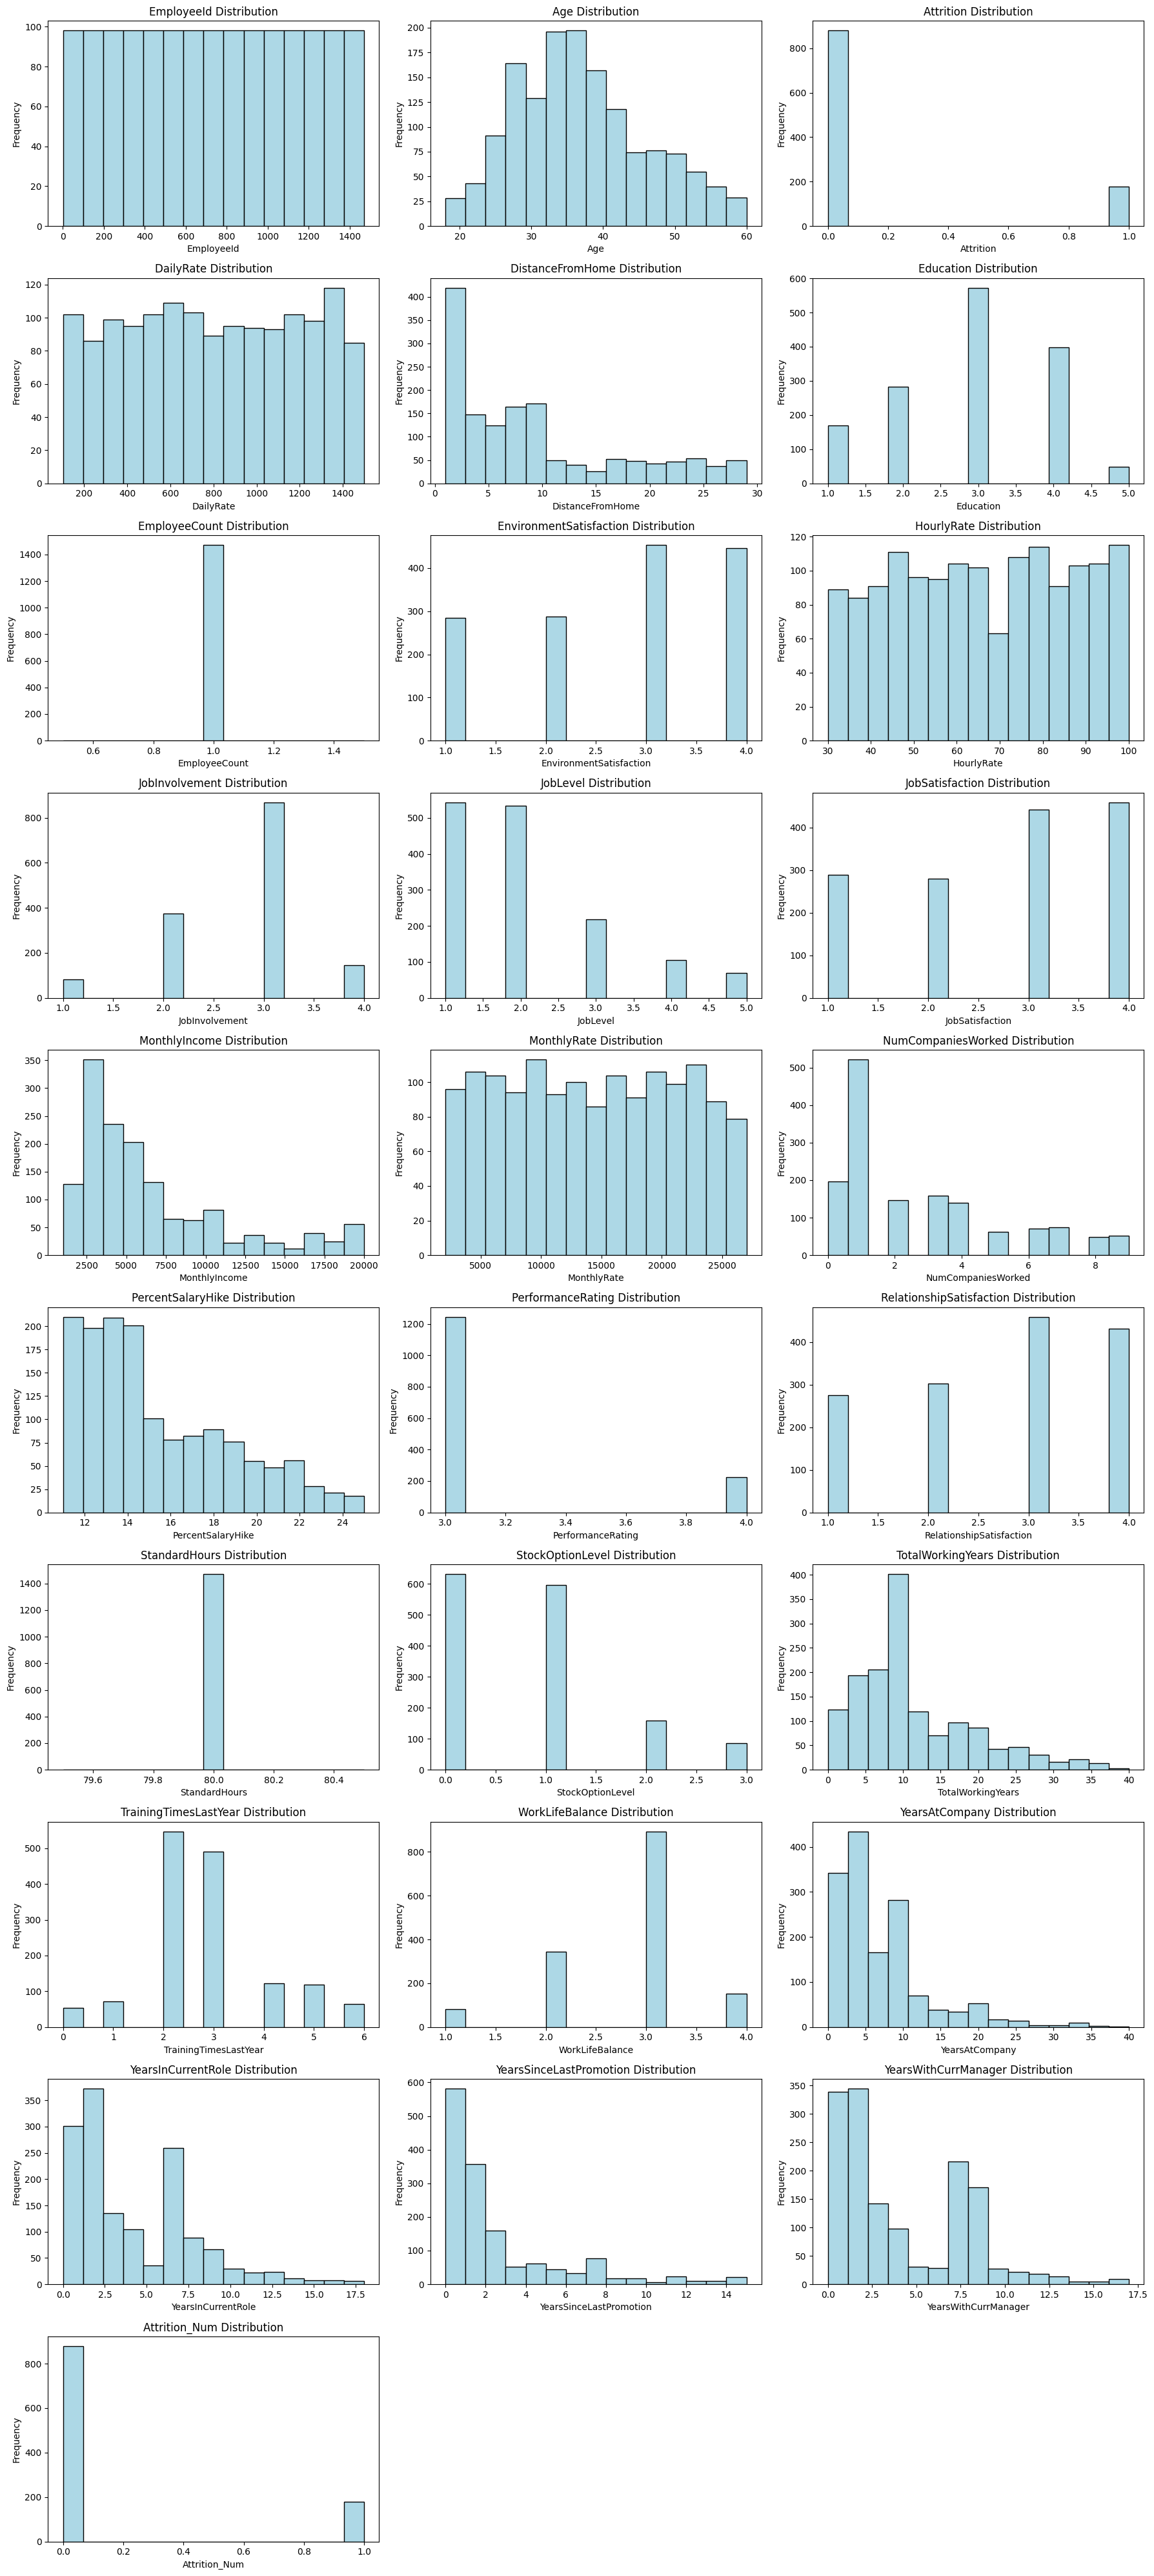

In [ ]:
blue_light = '#ADD8E6'
numerical = df_edu.select_dtypes(include=['int64', 'float64']).columns.tolist()
n = len(numerical)
fig, axes = plt.subplots(nrows=int(np.ceil(n / 3)), ncols=3, figsize=(18, 4 * int(np.ceil(n / 3))))
axes = axes.flatten()

for idx, col in enumerate(numerical):
    axes[idx].hist(df_edu[col].dropna(), bins=15, color=blue_light, edgecolor='black')
    axes[idx].set_title(f'{col} Distribution')
    axes[idx].set_xlabel(f'{col}')
    axes[idx].set_ylabel('Frequency')

for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Berdasarkan distribusi fitur pada dataset, dapat dilihat bahwa Age memiliki sebaran menyerupai distribusi normal, dengan mayoritas karyawan berusia antara 30 hingga 40 tahun. Attrition (baik Attrition maupun Attrition_Num) menunjukkan bahwa sebagian besar karyawan tidak mengalami attrition (tetap bekerja), sedangkan yang keluar relatif sedikit. Untuk variabel DistanceFromHome, banyak karyawan tinggal dalam jarak dekat ke kantor, meskipun ada sedikit yang tinggal jauh. Distribusi Education, EnvironmentSatisfaction, JobInvolvement, JobLevel, dan JobSatisfaction menunjukkan pola kategorikal dengan mayoritas responden memilih nilai menengah atau tinggi. Fitur MonthlyIncome memperlihatkan distribusi right-skewed, artinya sebagian besar karyawan berpenghasilan rendah hingga menengah, dan hanya sedikit yang berpenghasilan sangat tinggi.

Distribusi NumCompaniesWorked, TotalWorkingYears, dan YearsAtCompany juga miring ke kanan, mengindikasikan bahwa sebagian besar karyawan memiliki pengalaman kerja yang relatif sedikit. PercentSalaryHike sebagian besar terkonsentrasi pada angka 11–15%. Untuk PerformanceRating, hampir semua karyawan mendapatkan rating 3, dengan sedikit yang mendapat rating 4, menunjukkan sistem evaluasi kinerja yang homogen. StockOptionLevel didominasi oleh level 0 dan 1. TrainingTimesLastYear mayoritas di angka 2, sedangkan WorkLifeBalance kebanyakan berada di level 3, yang menunjukkan keseimbangan hidup dan kerja tergolong cukup baik.

YearsInCurrentRole, YearsSinceLastPromotion, dan YearsWithCurrManager semuanya memperlihatkan bahwa mayoritas karyawan memiliki masa kerja yang pendek di posisi atau di bawah manajer saat ini. Secara umum, banyak fitur numerik dalam dataset ini memiliki distribusi yang skewed (tidak simetris), sehingga perlu dipertimbangkan teknik seperti transformasi data saat pemodelan machine learning.

### Visualisasi untuk Fitur Kategorikal dan Ordinal

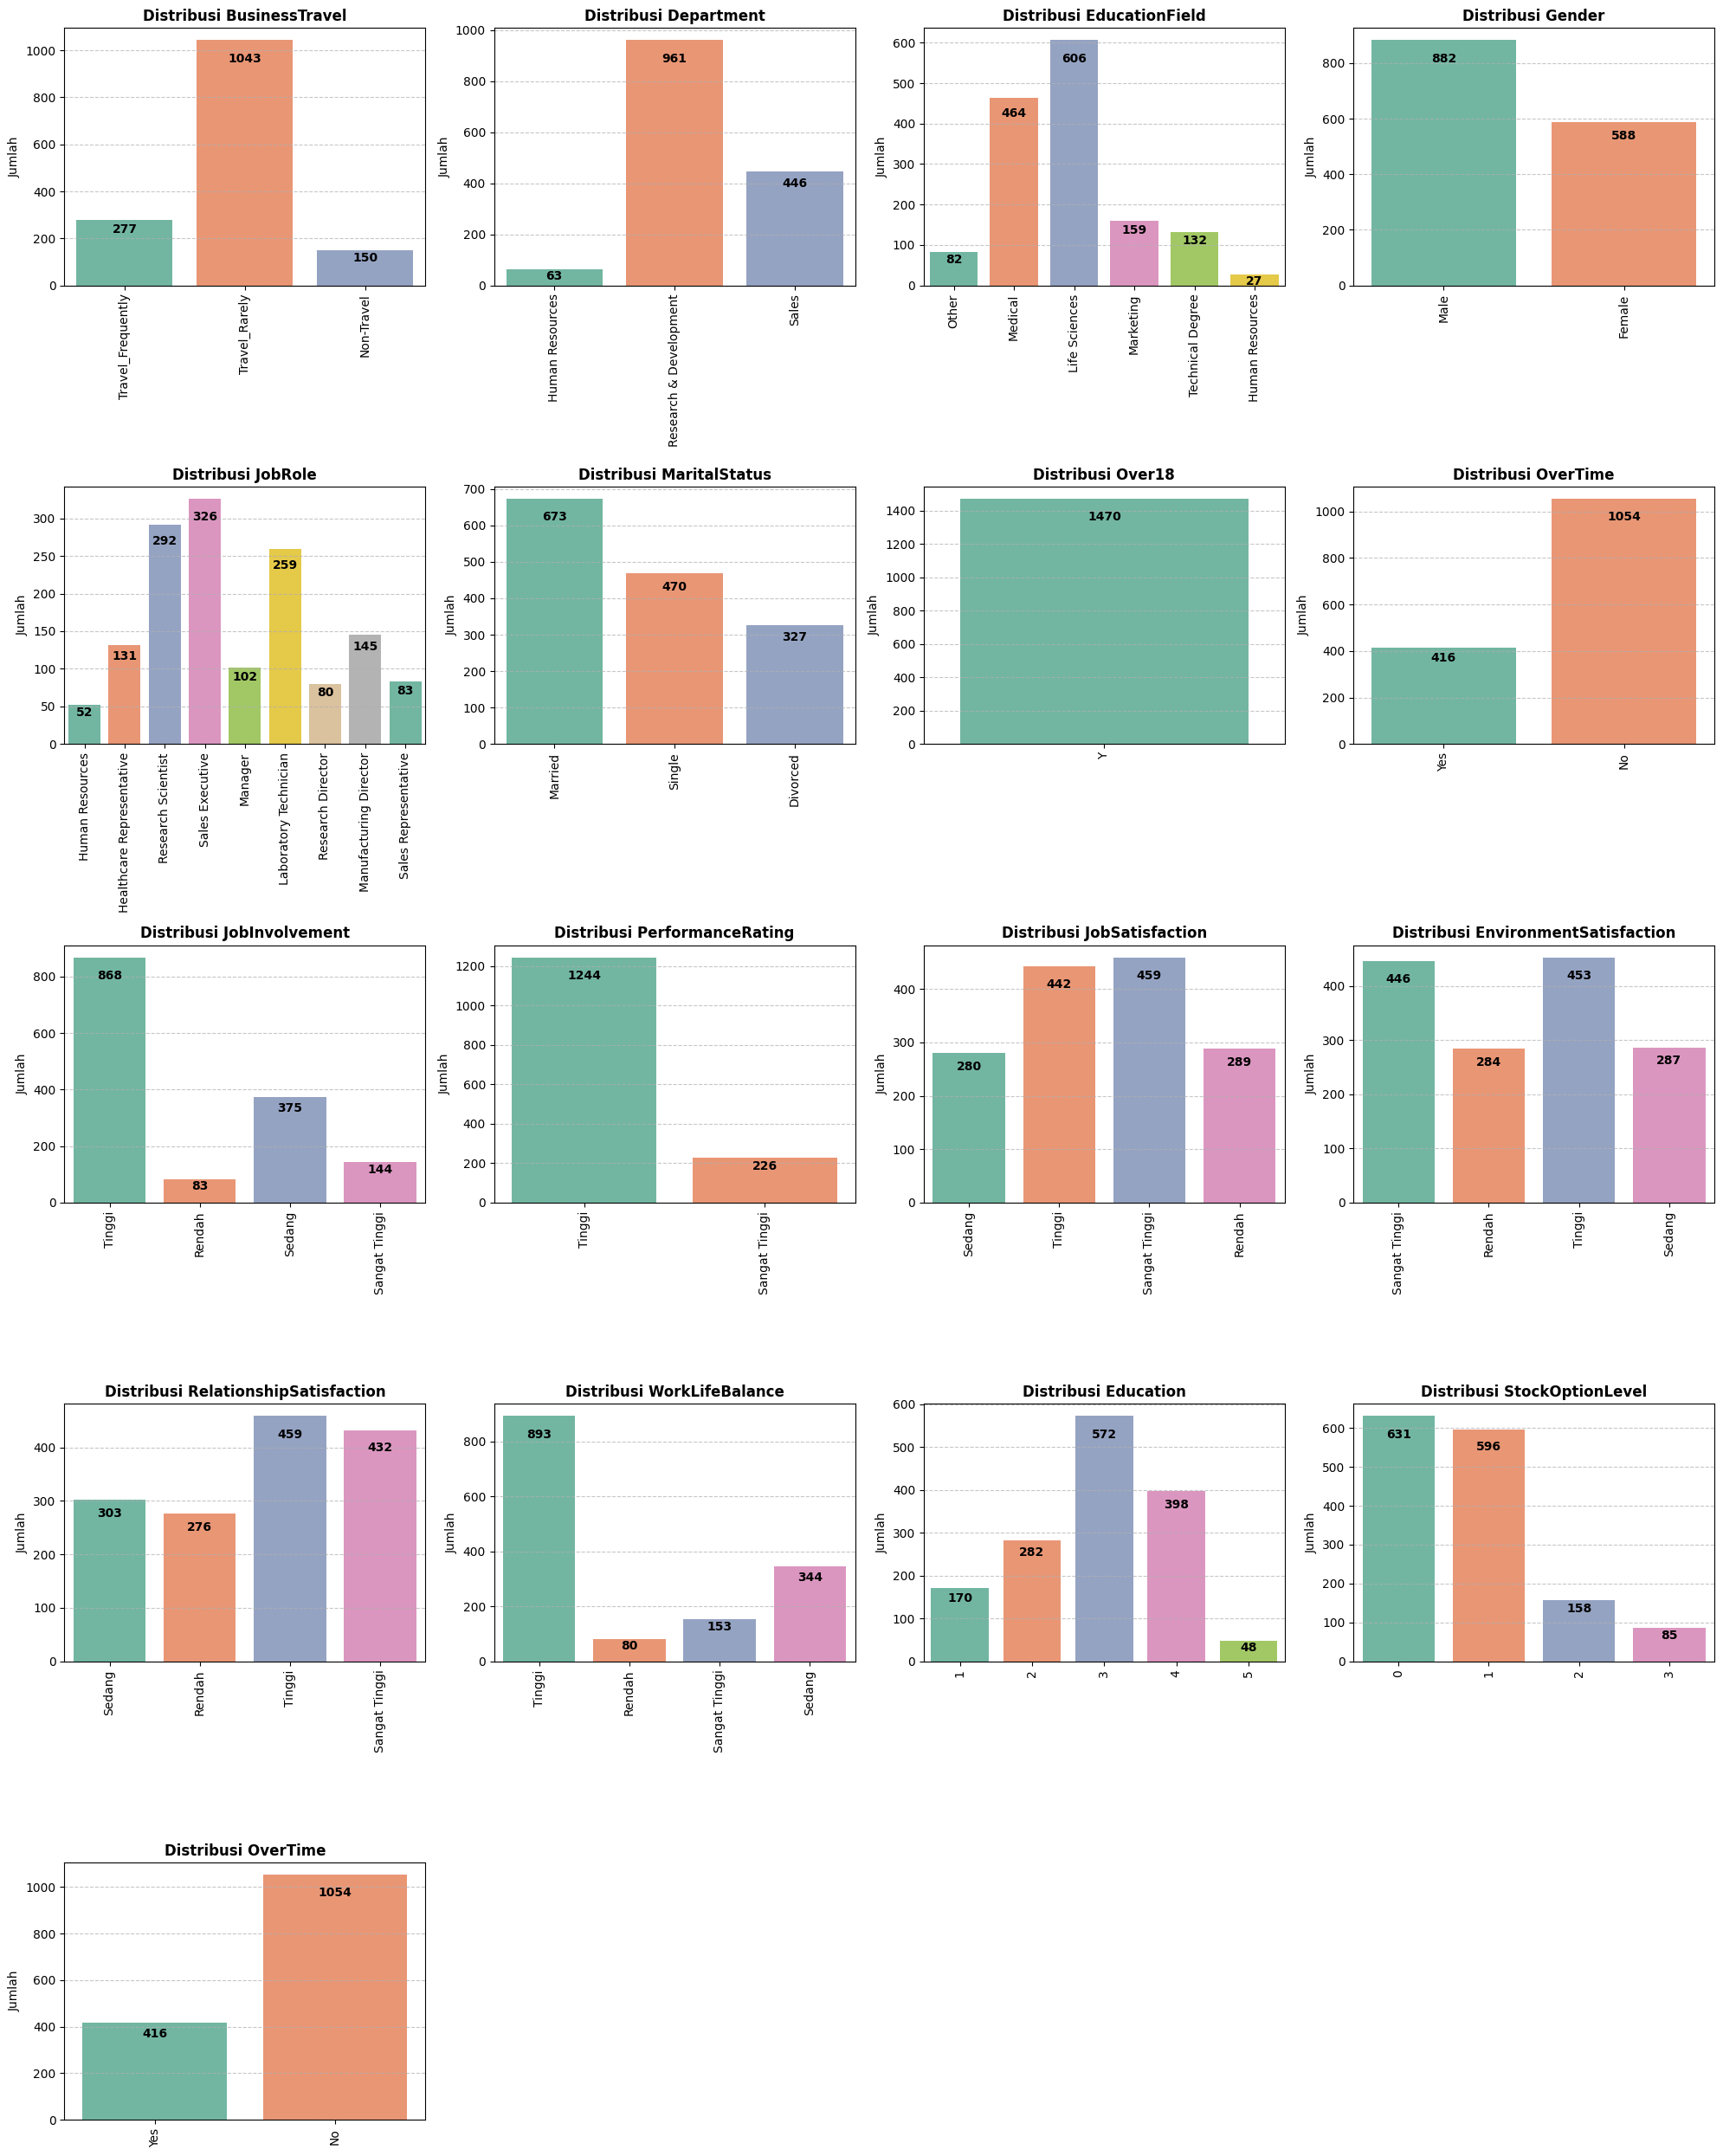

In [ ]:
categorical = [col for col in df_edu.columns if df_edu[col].dtype == 'object']

ordinal_features = [
    'JobInvolvement', 'PerformanceRating', 'JobSatisfaction',
    'EnvironmentSatisfaction', 'RelationshipSatisfaction',
    'WorkLifeBalance', 'Education', 'StockOptionLevel', 'OverTime'
]

categorical += ordinal_features

ordinal_mapping = {
    1: 'Rendah',
    2: 'Sedang',
    3: 'Tinggi',
    4: 'Sangat Tinggi'
}

columns_to_map = [
    'JobInvolvement', 'PerformanceRating', 'JobSatisfaction',
    'EnvironmentSatisfaction', 'RelationshipSatisfaction',
    'WorkLifeBalance'
]

df_plot = df_edu.copy()

for col in columns_to_map:
    if col in df_plot.columns:
        df_plot[col] = df_plot[col].map(ordinal_mapping)

n_cols = 4
n_rows = (len(categorical) + n_cols - 1) // n_cols

fig, ax = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))

for i, feature in enumerate(categorical):
    row = i // n_cols
    col = i % n_cols

    set2_palette = sns.color_palette("Set2", n_colors=len(df_plot[feature].unique()))

    sns.countplot(data=df_plot, x=feature, ax=ax[row, col], palette=set2_palette)

    ax[row, col].set_title(f"Distribusi {feature}", fontsize=12, fontweight='bold')
    ax[row, col].set_xlabel('')
    ax[row, col].set_ylabel('Jumlah')
    ax[row, col].grid(axis='y', linestyle='--', alpha=0.7)

    for bar in ax[row, col].patches:
        ax[row, col].annotate(
            str(int(bar.get_height())),
            (bar.get_x() + bar.get_width() / 2, bar.get_height() - (bar.get_height() * 0.05)),
            ha='center', va='top', fontsize=10, color='black', weight='bold'
        )

    ax[row, col].tick_params(axis='x', rotation=90)

for j in range(len(categorical), n_rows * n_cols):
    fig.delaxes(ax[j // n_cols, j % n_cols])

plt.subplots_adjust(hspace=1.2, wspace=0.3)
plt.tight_layout()
plt.show()

Dari distribusi fitur kategorikal, terlihat bahwa sebagian besar karyawan melakukan perjalanan bisnis dalam kategori "Travel_Rarely", jauh lebih banyak dibandingkan yang "Travel_Frequently" maupun "Non-Travel". Pada distribusi Department, mayoritas karyawan berasal dari departemen Research & Development, diikuti oleh Sales dan Human Resources. Untuk EducationField, mayoritas karyawan berlatar belakang Life Sciences dan Medical, sementara jurusan lain seperti Human Resources dan Technical Degree jauh lebih sedikit. Distribusi Gender menunjukkan lebih banyak karyawan pria daripada wanita. Sementara itu, pada distribusi JobRole, posisi Laboratory Technician, Sales Executive, dan Research Scientist menjadi yang paling dominan.

Pada fitur MaritalStatus, sebagian besar karyawan sudah menikah, diikuti oleh yang masih lajang dan bercerai. Hampir seluruh karyawan berumur di atas 18 tahun (Over18 = 'Y'), sehingga fitur ini kurang variatif. Distribusi OverTime menunjukkan bahwa lebih banyak karyawan yang tidak bekerja lembur dibandingkan yang sering lembur, meski jumlah lembur tetap cukup signifikan. Untuk fitur JobInvolvement, sebagian besar karyawan menunjukkan tingkat keterlibatan kerja yang tinggi. Demikian juga untuk PerformanceRating, mayoritas mendapatkan rating 3 (sangat baik) dengan sedikit yang mendapat rating lebih tinggi.

Distribusi JobSatisfaction, EnvironmentSatisfaction, RelationshipSatisfaction, dan WorkLifeBalance semuanya memperlihatkan kecenderungan positif, di mana mayoritas karyawan merasa puas dengan kondisi mereka. Pada distribusi Education (tingkat pendidikan), mayoritas karyawan berada di level 3 (mungkin setara S1), dan sedikit yang berada di level tertinggi. Akhirnya, distribusi StockOptionLevel menunjukkan sebagian besar karyawan memiliki level 0 atau 1 untuk opsi saham, dengan hanya sedikit yang memiliki level lebih tinggi.

### Visualisasi Boxplot Berdasarkan Segmentasi (JobRole)

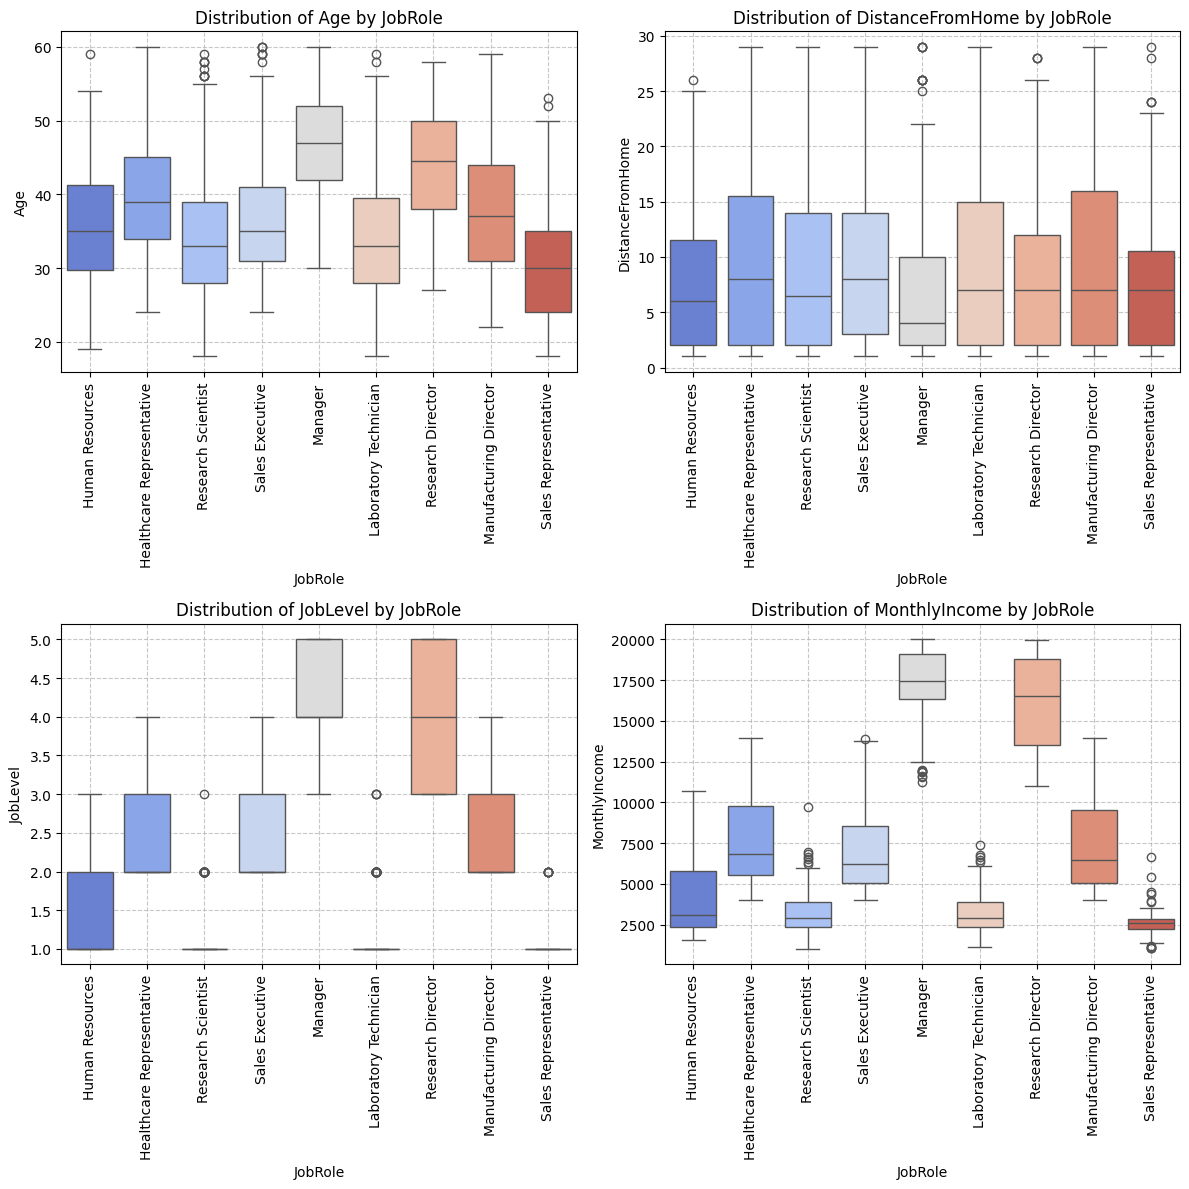

In [ ]:
def numerical_dis_plot(features, df, segment_feature=None, showfliers=True):
    num_features = len(features)

    ncols = 2
    nrows = (num_features // 2) + (num_features % 2)

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 6 * nrows))
    axes = axes.flatten()

    for i, feature in enumerate(features):
        ax = axes[i]

        if segment_feature:
            sns.boxplot(x=segment_feature, y=feature, data=df, ax=ax, palette='coolwarm', showfliers=showfliers)
            ax.set_title(f'Distribution of {feature} by {segment_feature}')
            ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
        else:
            sns.boxplot(y=df[feature], ax=ax, showfliers=showfliers)
            ax.set_title(f'Distribution of {feature}')

        ax.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

numerical_dis_plot(
    features=['Age', 'DistanceFromHome', 'JobLevel', 'MonthlyIncome'],
    df=df_edu,
    segment_feature='JobRole',
    showfliers=True
)

1. Distribution of Age by JobRole

>Grafik ini memperlihatkan distribusi usia karyawan berdasarkan posisi pekerjaan.
Dari sini terlihat:
* Posisi Manager, Research Director, dan Manufacturing Director cenderung diisi oleh karyawan yang lebih tua (usia median lebih tinggi). Sedangkan posisi Sales Representative didominasi oleh usia yang lebih muda.
* Ada outlier di beberapa role, misalnya Manager ada beberapa karyawan yang usianya lebih tinggi dari kebanyakan.


2. Distribution of DistanceFromHome by JobRole

>Grafik ini menunjukkan distribusi jarak rumah ke kantor berdasarkan JobRole.
Hasil pengamatannya:
* Jarak tempuh karyawan cukup bervariasi di semua posisi, namun secara umum Laboratory Technician dan Manager memiliki jarak rata-rata yang lebih dekat ke kantor dibandingkan lainnya.
* Terdapat outlier untuk beberapa posisi seperti Healthcare Representative yang memiliki jarak sangat jauh.

3. Distribution of JobLevel by JobRole

>Grafik ini memperlihatkan distribusi tingkatan jabatan (Job Level) berdasarkan posisi pekerjaan.
* Research Director dan Manager memiliki level jabatan lebih tinggi (banyak di level 4-5).
* Sales Representative, Laboratory Technician, dan Human Resources rata-rata di level lebih rendah (1-2). Ini wajar karena job level biasanya terkait dengan senioritas.

4. Distribution of MonthlyIncome by JobRole

>Grafik ini menunjukkan distribusi pendapatan bulanan berdasarkan JobRole.
* Posisi Research Director dan Manager mendapatkan gaji bulanan yang paling tinggi, konsisten dengan job level mereka. Sebaliknya, Sales Representative dan Laboratory Technician memiliki pendapatan bulanan yang relatif lebih rendah.
* Terdapat banyak outlier gaji, menunjukkan variasi penghasilan dalam satu role bisa cukup lebar.



### Analisis Tingkat Kepuasan Karyawan

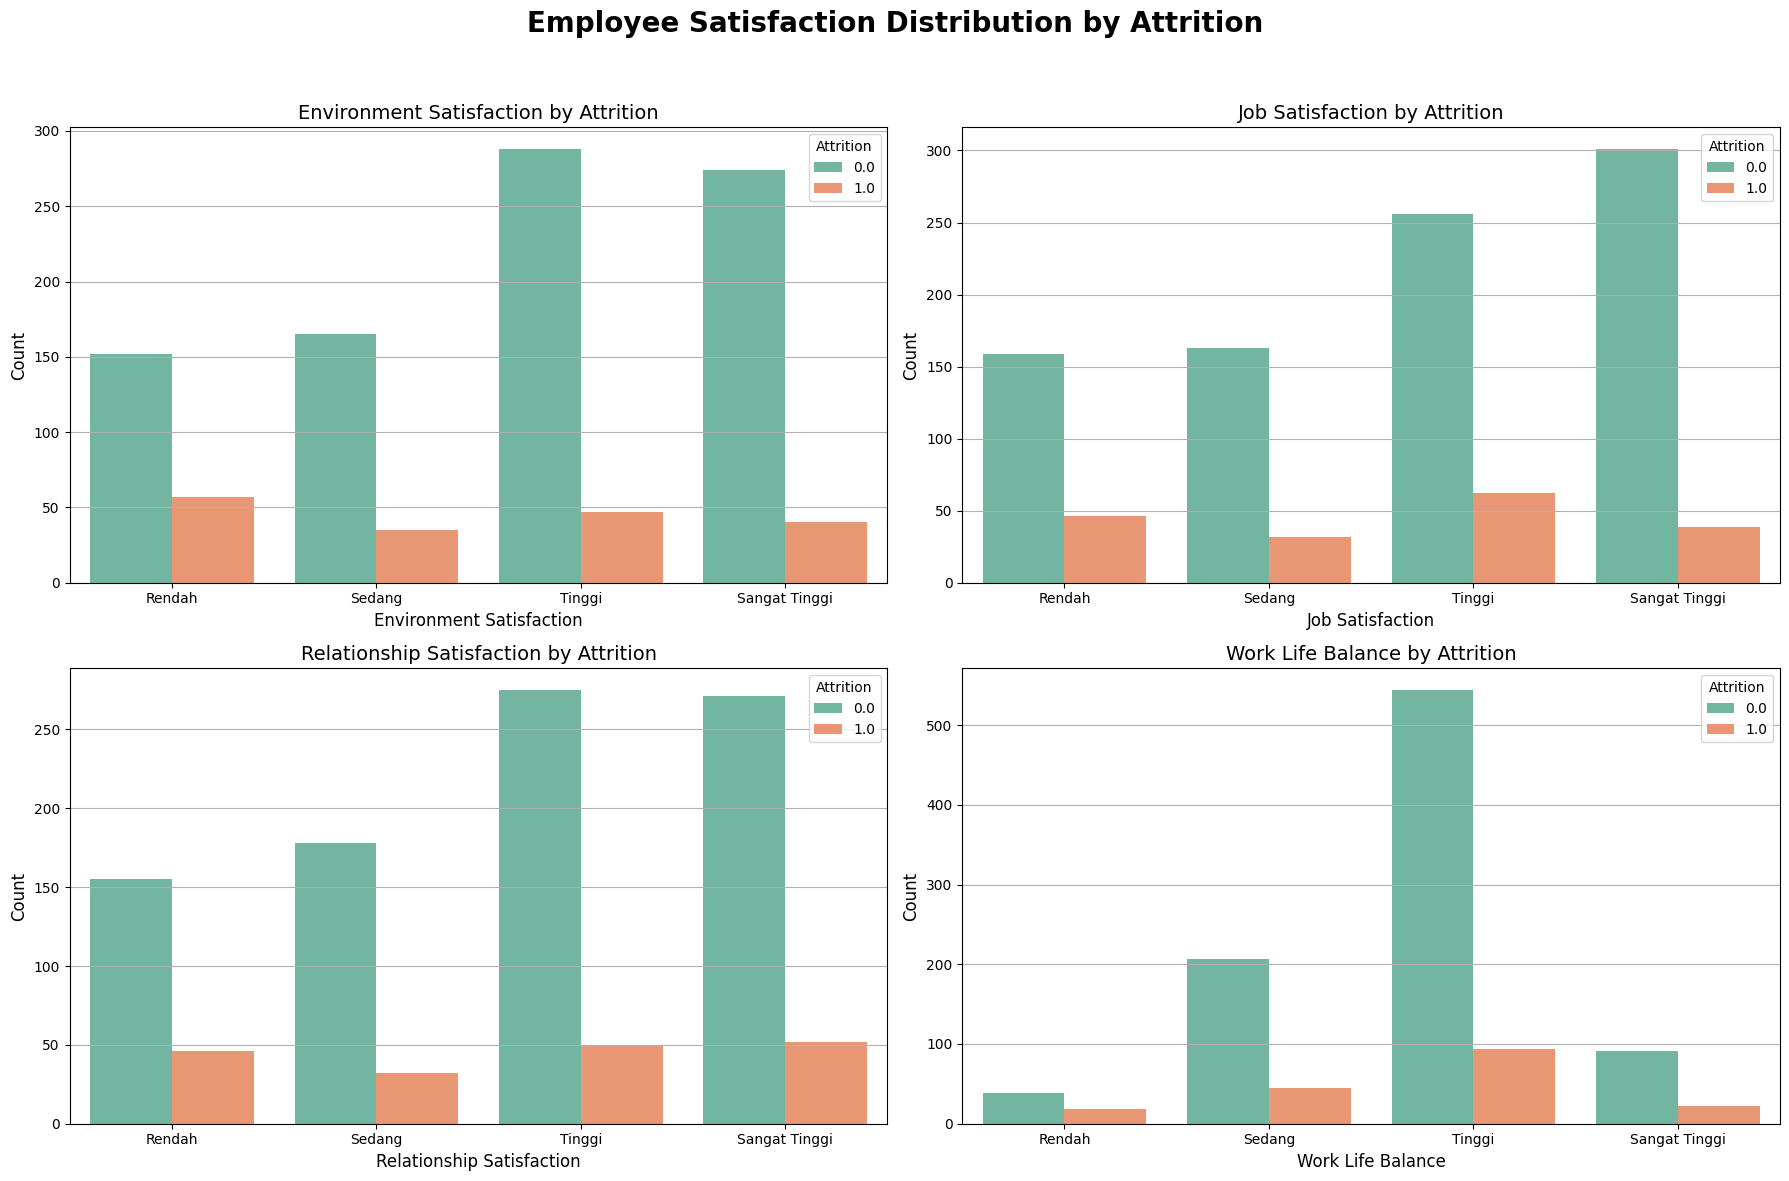

In [ ]:
satisfaction_cols = ['EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance']
titles = ['Environment Satisfaction', 'Job Satisfaction', 'Relationship Satisfaction', 'Work Life Balance']

satisfaction_mapping = {
    1: 'Rendah',
    2: 'Sedang',
    3: 'Tinggi',
    4: 'Sangat Tinggi'
}

df_plot = df_edu.copy()

for col in satisfaction_cols:
    df_plot[col + '_Label'] = df_plot[col].map(satisfaction_mapping)

df_plot['Attrition_Num'] = df_plot['Attrition'].map({'Stay': 0, 'Leave': 1})

df_plot_clean = df_plot.dropna(subset=satisfaction_cols)

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

for idx, col in enumerate(satisfaction_cols):
    ax = axes[idx // 2, idx % 2]
    sns.countplot(data=df_plot, x=col + '_Label', hue='Attrition', palette='Set2', ax=ax, order=['Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi'])
    ax.set_title(f'{titles[idx]} by Attrition', fontsize=14)
    ax.set_xlabel(titles[idx], fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.legend(title='Attrition', loc='upper right')
    ax.grid(axis='y')

plt.suptitle('Employee Satisfaction Distribution by Attrition', fontsize=20, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Gambar tersebut menunjukkan distribusi kepuasan karyawan terhadap attrition (keluar atau bertahan di perusahaan) berdasarkan empat aspek:
* Dari grafik Environment Satisfaction, menunjukkan hubungan antara tingkat kepuasan lingkungan kerja dengan attrition. Karyawan dengan tingkat kepuasan lingkungan yang rendah ("Rendah" dan "Sedang") memiliki tingkat attrition yang lebih tinggi dibandingkan mereka yang memiliki kepuasan "Tinggi" dan "Sangat Tinggi". Artinya, semakin puas karyawan terhadap lingkungan kerjanya, semakin kecil kemungkinan mereka untuk keluar dari perusahaan.
* Pada grafik Job Satisfaction, pola serupa juga terlihat. Karyawan yang melaporkan tingkat kepuasan kerja yang "Rendah" dan "Sedang" memiliki angka attrition yang lebih tinggi daripada karyawan dengan kepuasan kerja "Tinggi" dan "Sangat Tinggi". Ini menunjukkan bahwa tingkat kepuasan terhadap pekerjaan secara langsung berkaitan dengan keinginan karyawan untuk bertahan di perusahaan.
* Grafik Relationship Satisfaction memperlihatkan bahwa tingkat kepuasan dalam hubungan sosial di tempat kerja berpengaruh terhadap attrition, meskipun tidak sekuat pengaruh lingkungan atau kepuasan kerja. Karyawan dengan hubungan kerja yang lebih harmonis ("Tinggi" dan "Sangat Tinggi") lebih cenderung bertahan, sedangkan mereka yang merasa hubungan kerjanya buruk ("Rendah" dan "Sedang") lebih banyak yang memilih keluar.
* Grafik Work Life Balance menunjukkan pengaruh yang sangat besar terhadap attrition. Karyawan dengan keseimbangan kehidupan kerja yang "Tinggi" menunjukkan angka bertahan yang jauh lebih tinggi, sementara mereka yang merasakan keseimbangan "Rendah" atau "Sedang" memiliki risiko keluar yang lebih besar. Keseimbangan antara kehidupan pribadi dan pekerjaan terbukti menjadi faktor kunci dalam menjaga retensi karyawan.

## Data Preparation / Preprocessing

### Menangani Missing Value

In [ ]:
df_edu.head().T

,0,1,2,3,4
EmployeeId,1,2,3,4,5
Age,38,37,51,42,40
Attrition,NaN,1.0,1.0,0.0,NaN
BusinessTravel,Travel_Frequently,Travel_Rarely,Travel_Rarely,Travel_Frequently,Travel_Rarely
DailyRate,1444,1141,1323,555,1194
Department,Human Resources,Research & Development,Research & Development,Sales,Research & Development
DistanceFromHome,1,11,4,26,2
Education,4,2,4,3,4
EducationField,Other,Medical,Life Sciences,Marketing,Medical
EmployeeCount,1,1,1,1,1


In [ ]:
df_edu = df_edu.dropna(subset=['Attrition'])

In [ ]:
df_edu = df_edu.drop(columns=['EmployeeId', 'EmployeeCount', 'StandardHours', 'Over18', 'Attrition_Num'])

In [ ]:
# Pisahkan fitur (X) dan target (y)
X = df_edu.drop(columns=['Attrition'])
y = df_edu['Attrition']

In [ ]:
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numerical_cols),

        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_cols)
    ])

In [ ]:
X_preprocessed = preprocessor.fit_transform(X)

# Menampilkan hasil preprocessing
print(f"Shape after preprocessing: {X_preprocessed.shape}")

Shape after preprocessing: (1058, 51)


In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X_preprocessed, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Cek bentuk hasil pembagian
print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(740, 51) (159, 51) (159, 51)
(740,) (159,) (159,)


Split data menjadi data training, data validation, dan data testing dengan pembagian sebagai berikut
* 70% untuk training (X_train, y_train)
* 15% untuk validation (X_val, y_val)
* 15% untuk testing (X_test, y_test)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print('Sebelum SMOTE:', X_train.shape, y_train.value_counts().to_dict())
print('Setelah SMOTE:', X_train_resampled.shape, dict(zip(*np.unique(y_train_resampled, return_counts=True))))

Sebelum SMOTE: (740, 51) {0.0: 616, 1.0: 124}
Setelah SMOTE: (1232, 51) {np.float64(0.0): np.int64(616), np.float64(1.0): np.int64(616)}


Karena dataset attrition biasanya imbalanced (misal: banyak yang stay, sedikit yang resign), maka dilakukan SMOTE di training set. SMOTE (Synthetic Minority Over-sampling Technique) membuat data baru untuk kelas minoritas supaya distribusinya seimbang.

## Modeling

### Random Forest dengan Hyperparameter Tuning

In [ ]:
# Hyperparameter tuning Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train_resampled, y_train_resampled)

best_rf = grid_search.best_estimator_

Fitting 5 folds for each of 81 candidates, totalling 405 fits


### XGBoost

In [ ]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

### Logistic Regression

In [ ]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(random_state=42)

### SVM

In [ ]:
from sklearn.svm import SVC

svm_model = SVC(random_state=42, kernel='rbf')
svm_model.fit(X_train, y_train)

SVC(random_state=42)

## Evaluation

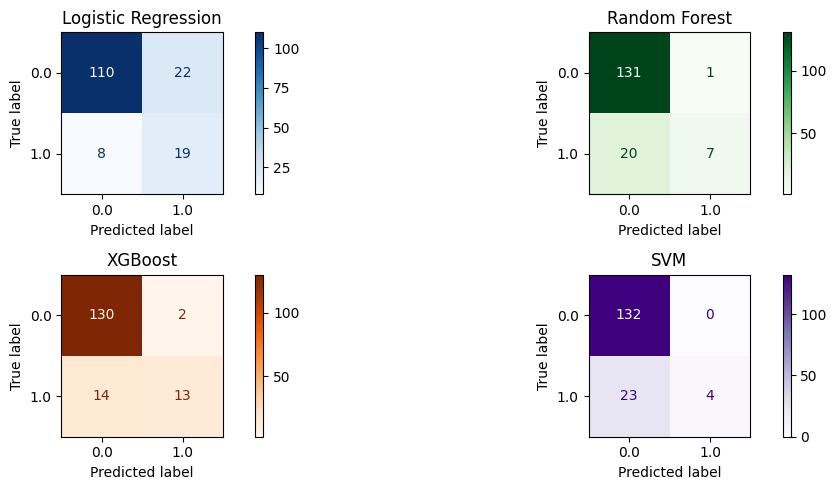

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Set ukuran plot
fig, axes = plt.subplots(2, 2, figsize=(12, 5))

# Logistic Regression
ConfusionMatrixDisplay.from_estimator(lr_model, X_test, y_test, ax=axes[0, 0], cmap='Blues')
axes[0, 0].title.set_text('Logistic Regression')

# Random Forest
ConfusionMatrixDisplay.from_estimator(best_rf, X_test, y_test, ax=axes[0, 1], cmap='Greens')
axes[0, 1].title.set_text('Random Forest')

# XGBoost
ConfusionMatrixDisplay.from_estimator(xgb_model, X_test, y_test, ax=axes[1, 0], cmap='Oranges')
axes[1, 0].title.set_text('XGBoost')

#SVM
ConfusionMatrixDisplay.from_estimator(svm_model, X_test, y_test, ax=axes[1, 1], cmap='Purples')
axes[1, 1].title.set_text('SVM')

plt.tight_layout()
plt.show()

### 1. **Logistic Regression**
- **Benar prediksi bertahan (0):** 110 orang
- **Salah prediksi bertahan sebagai keluar (1):** 22 orang
- **Salah prediksi keluar sebagai bertahan:** 8 orang
- **Benar prediksi keluar:** 19 orang

**Artinya:** Logistic Regression lumayan, tapi masih cukup banyak salah klasifikasi untuk karyawan yang bertahan dan keluar.


### 2. **Random Forest**
- **Benar prediksi bertahan (0):** 131 orang
- **Salah prediksi bertahan sebagai keluar (1):** 1 orang
- **Salah prediksi keluar sebagai bertahan:** 20 orang
- **Benar prediksi keluar:** 7 orang

**Artinya:** Random Forest sangat bagus dalam memprediksi karyawan yang bertahan, tapi agak kesulitan mengenali karyawan yang akan keluar (Attrition = 1).

### 3. **XGBoost**
- **Benar prediksi bertahan (0):** 130 orang
- **Salah prediksi bertahan sebagai keluar (1):** 2 orang
- **Salah prediksi keluar sebagai bertahan:** 14 orang
- **Benar prediksi keluar:** 13 orang

**Artinya:** XGBoost lebih seimbang. Meskipun sedikit salah memprediksi bertahan, dia lebih baik dibanding Random Forest dalam mengenali karyawan yang keluar.

### 4. **SVM (Support Vector Machine)**
- **Benar prediksi bertahan (0):** 132 orang
- **Salah prediksi bertahan sebagai keluar (1):** 0 orang (perfect di kelas 0)
- **Salah prediksi keluar sebagai bertahan:** 23 orang
- **Benar prediksi keluar:** 4 orang

**Artinya:** SVM **sangat bagus** dalam memprediksi karyawan yang bertahan, tapi **buruk** dalam memprediksi karyawan yang resign. Hampir semua yang resign malah diprediksi tetap bertahan.

In [ ]:
# Prediksi ke data test
lr_pred = lr_model.predict(X_test)
rf_pred = best_rf.predict(X_test)
xgb_pred = xgb_model.predict(X_test)
svm_pred = svm_model.predict(X_test)

# Hitung metrik evaluasi
models = ['Logistic Regression', 'Random Forest', 'XGBoost', 'SVM']
accuracies = [
    accuracy_score(y_test, lr_pred),
    accuracy_score(y_test, rf_pred),
    accuracy_score(y_test, xgb_pred),
    accuracy_score(y_test, svm_pred)
]
precisions = [
    precision_score(y_test, lr_pred),
    precision_score(y_test, rf_pred),
    precision_score(y_test, xgb_pred),
    precision_score(y_test, svm_pred)
]
recalls = [
    recall_score(y_test, lr_pred),
    recall_score(y_test, rf_pred),
    recall_score(y_test, xgb_pred),
    recall_score(y_test, svm_pred)
]
f1_scores = [
    f1_score(y_test, lr_pred),
    f1_score(y_test, rf_pred),
    f1_score(y_test, xgb_pred),
    f1_score(y_test, svm_pred)
]


results_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1-Score': f1_scores
})

print("Model Evaluation Results:")
display(results_df)

Model Evaluation Results:


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.811321,0.463415,0.703704,0.558824
1,Random Forest,0.867925,0.875000,0.259259,0.400000
2,XGBoost,0.899371,0.866667,0.481481,0.619048
3,SVM,0.855346,1.000000,0.148148,0.258065


* XGBoost menunjukkan performa terbaik secara keseluruhan dengan accuracy tertinggi sebesar 89.9% dan F1-Score tertinggi 61.9%. Ini mengindikasikan bahwa XGBoost mampu menjaga keseimbangan antara Precision dan Recall dalam memprediksi "Attrition".

* Random Forest menghasilkan precision yang tinggi (87.5%), namun memiliki recall yang rendah (25.9%), sehingga cenderung hanya mengklasifikasikan contoh positif yang mudah dikenali, tetapi gagal mendeteksi sebagian besar kasus sebenarnya.

* Support Vector Machine (SVM) memiliki precision sempurna (100%), namun recall sangat rendah (14.8%), menunjukkan bahwa model ini hanya memprediksi sedikit kasus positif dan banyak melewatkan data yang seharusnya positif.

* Logistic Regression memiliki recall tertinggi (70.4%) di antara semua model, yang berarti model ini lebih baik dalam mendeteksi kasus "Attrition", namun memiliki precision yang rendah (46.3%), menyebabkan lebih banyak kesalahan prediksi positif.

## Simpan Model terbaik

In [ ]:
import joblib
import os

# Buat folder model
os.makedirs('model', exist_ok=True)

# Save model
joblib.dump(xgb_model, 'model/xgboost_model.pkl')

['model/xgboost_model.pkl']

In [ ]:
joblib.dump(preprocessor, 'model/preprocessor.pkl')

['model/preprocessor.pkl']

In [ ]:
!pip freeze > requirements.txt

## Kesimpulan Proyek Analisis Attrition Karyawan Jaya Jaya Maju

### 1. Hasil Model Machine Learning
Berdasarkan pertimbangan semua metrik evaluasi, XGBoost dipilih sebagai model terbaik untuk tugas klasifikasi "Employee Attrition" ini, karena menghasilkan performa yang paling seimbang dan optimal. Model ini direkomendasikan untuk digunakan dalam proses prediksi lebih lanjut serta mendukung pengambilan keputusan pada proyek ini.

---

### 2. Faktor-Faktor yang Mempengaruhi Attrition (Lebih Detail)

Berdasarkan feature importance dan data observasi, faktor-faktor berikut sangat berpengaruh terhadap keputusan resign:

a. **OverTime** : Karyawan yang sering lembur memiliki peluang keluar 2 sampai 3 kali lipat lebih tinggi dibanding yang tidak lembur.

b. **MonthlyIncome** : Karyawan dengan gaji < 5000 USD per bulan lebih rentan resign, khususnya pada level junior dan mid.

c. **JobRole** : Posisi seperti Sales Executive dan Laboratory Technician cenderung memiliki angka keluar lebih tinggi dibanding Research Scientist atau Manager.

d. **EnvironmentSatisfaction** : Skor lingkungan kerja < 3 (dari 4) menunjukkan ketidakpuasan dan meningkatkan risiko keluar.

e. **DistanceFromHome** : Karyawan yang tinggal > 10 km dari kantor lebih berisiko resign.

f. **JobSatisfaction** : Karyawan dengan kepuasan kerja rendah (skor 1-2 dari 4) lebih sering keluar dibanding yang puas (skor 3-4).

g. **Age** : Karyawan usia 25 sampai 35 tahun cenderung mencari peluang baru dibanding usia lebih senior.

h. **MaritalStatus** : Single lebih banyak resign dibanding yang sudah menikah, karena lebih mobile dan fleksibel dalam mengambil peluang baru.

i. **TotalWorkingYears** : Karyawan dengan pengalaman kerja < 5 tahun lebih banyak berpindah dibanding senior yang sudah lebih stabil.

---

### 3. Rekomendasi Action Items untuk Perusahaan

Untuk mengurangi angka attrition, perusahaan **Jaya Jaya Maju** disarankan melakukan:

a. Atur Pola Lembur
- Pantau karyawan dengan jam lembur tinggi.
- Terapkan aturan maksimal lembur dan beri kompensasi tambahan.

b. Tingkatkan Skema Gaji dan Benefit
- Fokus peningkatan gaji untuk karyawan dengan penghasilan di bawah 5000 USD.
- Tawarkan bonus performance-based untuk posisi yang riskan.

c. Program Retensi untuk Karyawan Usia 25–35 tahun
- Tawarkan jalur karier yang jelas.
- Berikan kesempatan promosi atau rotasi antar departemen.

d. Fasilitas Transportasi atau WFH
- Pertimbangkan subsidi transportasi untuk karyawan yang tinggal jauh.
- Implementasikan opsi **hybrid working** untuk meningkatkan fleksibilitas.

e. Perbaikan Lingkungan dan Kepuasan Kerja
- Adakan program feedback 360 derajat setiap 6 bulan.
- Tingkatkan engagement melalui event internal, workshop, atau employee appreciation.